##Testing Xray on the PRISM data

In [2]:
import xray
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
URL = 'http://cida.usgs.gov/thredds/dodsC/prism_v2'

In [4]:
ds = xray.open_dataset(URL)

In [5]:
ds

<xray.Dataset>
Dimensions:    (lat: 621, lon: 1405, tbnd: 2, time: 1440)
Coordinates:
  * lon        (lon) float32 -125.021 -124.979 -124.938 -124.896 -124.854 ...
  * lat        (lat) float32 49.9375 49.8958 49.8542 49.8125 49.7708 49.7292 ...
  * time       (time) datetime64[ns] 1895-01-01 1895-02-01 1895-03-01 ...
  * tbnd       (tbnd) int64 0 1
Data variables:
    time_bnds  (time, tbnd) float32 ...
    ppt        (time, lat, lon) float64 ...
    tmx        (time, lat, lon) float64 ...
    tmn        (time, lat, lon) float64 ...
Attributes:
    Conventions: CF-1.4
    acknowledgment: PRISM Climate Group, Oregon State University, http://prism.oregonstate.edu, Accessed August 2015.
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    title: Parameter-elevation Regressions on Independent Slopes Model Monthly Climate Data for the Continental United States. August 2015 Snapshot
    summary:  This dataset was created using the PRISM (Parameter-elevation Regressions on Independent

In [6]:
# select lat,lon region of interest
# note: slice(20.5,55.0) fails
dsloc = ds.sel(lon=slice(-75.0,-69.0),lat=slice(45.0,40.0))

In [7]:
dsloc

<xray.Dataset>
Dimensions:    (lat: 120, lon: 144, tbnd: 2, time: 1440)
Coordinates:
  * lon        (lon) float32 -74.9792 -74.9375 -74.8958 -74.8542 -74.8125 ...
  * lat        (lat) float32 44.9792 44.9375 44.8958 44.8542 44.8125 44.7708 ...
  * time       (time) datetime64[ns] 1895-01-01 1895-02-01 1895-03-01 ...
  * tbnd       (tbnd) int64 0 1
Data variables:
    time_bnds  (time, tbnd) float32 9131.0 9161.0 9162.0 9189.0 9190.0 ...
    ppt        (time, lat, lon) float64 58.03 55.95 54.56 53.92 54.26 54.99 ...
    tmx        (time, lat, lon) float64 -3.73 -3.68 -3.67 -3.83 -3.89 -3.94 ...
    tmn        (time, lat, lon) float64 -12.94 -12.94 -12.92 -12.88 -12.83 ...
Attributes:
    Conventions: CF-1.4
    acknowledgment: PRISM Climate Group, Oregon State University, http://prism.oregonstate.edu, Accessed August 2015.
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    title: Parameter-elevation Regressions on Independent Slopes Model Monthly Climate Data for the Continent

In [8]:
# select closest data to time of interest
date = datetime.datetime(2005,8,1,0,0)
#date = datetime.datetime.now()
ds_snapshot = dsloc.sel(time=date,method='nearest')

In [10]:
ds_snapshot.data_vars
# ds.coords
# ds.attrs

Data variables:
    time_bnds  (tbnd) float32 49520.0 49550.0
    ppt        (lat, lon) float64 97.85 95.44 93.59 92.65 92.37 92.32 92.05 ...
    tmx        (lat, lon) float64 26.77 26.79 26.81 26.84 26.92 26.95 26.95 ...
    tmn        (lat, lon) float64 15.5 15.34 15.25 15.47 15.88 16.15 16.11 ...

In [11]:
t = ds_snapshot['ppt']

In [12]:
t.shape

(120, 144)

In [15]:
tvals = t.data

In [16]:
tvals

array([[  97.85,   95.44,   93.59, ...,  109.25,   99.22,   97.85],
       [  98.45,   95.35,   93.51, ...,  103.04,   97.48,   97.03],
       [  97.84,   94.85,   92.79, ...,   96.45,   96.1 ,   95.92],
       ..., 
       [  62.36,   66.83,   76.14, ...,     nan,     nan,     nan],
       [  85.24,   88.14,   92.04, ...,     nan,     nan,     nan],
       [  99.48,   98.34,  100.39, ...,     nan,     nan,     nan]])

In [18]:
tvals = np.ma.masked_invalid(t.data)

In [19]:
tvals

masked_array(data =
 [[97.85000000000001 95.44 93.59 ..., 109.25 99.22 97.85000000000001]
 [98.45 95.35000000000001 93.51 ..., 103.04 97.48 97.03]
 [97.84 94.85000000000001 92.79 ..., 96.45 96.10000000000001 95.92]
 ..., 
 [62.36 66.83 76.14 ..., -- -- --]
 [85.24 88.14 92.04 ..., -- -- --]
 [99.48 98.34 100.39 ..., -- -- --]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]],
       fill_value = 1e+20)

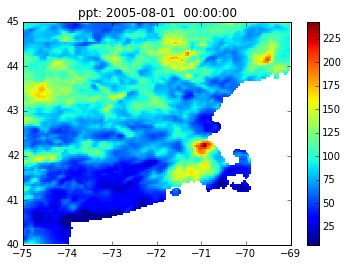

In [20]:
plt.pcolormesh(t.lon.data,t.lat.data,tvals)
plt.title(t.name+pd.Timestamp(t.time.values).strftime(': %Y-%m-%d  %H:%M:%S %Z %z'));
plt.colorbar();

In [21]:
tvals.min()

5.5899999999999999

In [22]:
# time series closest to specified lon,lat location
ds_series = ds.sel(lon=-72.,lat=42.,method='nearest')

In [23]:
# Select temperature and convert to Pandas Series
v_series = ds_series['ppt'].to_series()

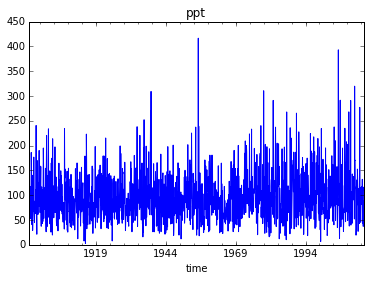

In [24]:
v_series.plot(title=v_series.name);

In [25]:
ds_snapshot

<xray.Dataset>
Dimensions:    (lat: 120, lon: 144, tbnd: 2)
Coordinates:
  * lon        (lon) float32 -74.9792 -74.9375 -74.8958 -74.8542 -74.8125 ...
  * lat        (lat) float32 44.9792 44.9375 44.8958 44.8542 44.8125 44.7708 ...
    time       datetime64[ns] 2005-08-01
  * tbnd       (tbnd) int64 0 1
Data variables:
    time_bnds  (tbnd) float32 49520.0 49550.0
    ppt        (lat, lon) float64 97.85 95.44 93.59 92.65 92.37 92.32 92.05 ...
    tmx        (lat, lon) float64 26.77 26.79 26.81 26.84 26.92 26.95 26.95 ...
    tmn        (lat, lon) float64 15.5 15.34 15.25 15.47 15.88 16.15 16.11 ...
Attributes:
    Conventions: CF-1.4
    acknowledgment: PRISM Climate Group, Oregon State University, http://prism.oregonstate.edu, Accessed August 2015.
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    title: Parameter-elevation Regressions on Independent Slopes Model Monthly Climate Data for the Continental United States. August 2015 Snapshot
    summary:  This dataset was crea

In [ ]:
#ds_snapshot.to_netcdf('ds_snapshot.nc')